<a href="https://colab.research.google.com/github/asdas6da6sd/practicas/blob/master/binarizaci%C3%B3n_y_tramos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
path ='/content/drive/My Drive/prodim/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/prodim


In [0]:
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

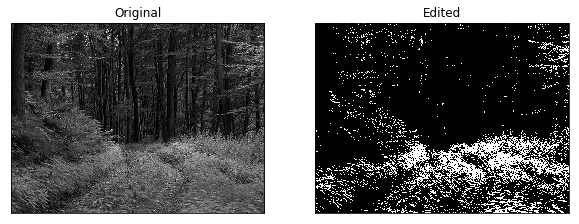

In [19]:
def binarizacion(img, minr=10,maxr=60):
    img = cv2.imread(img,0)
    row,column = img.shape
    img1 = np.zeros((row,column),dtype = 'uint8')
                 
    min_r = minr
    max_r = maxr
    
    for i in range (row):
        for j in range (column):
            if img[i,j]>min_r and img[i,j]< max_r:
                img1[i,j] =255
            else:
              img1[i,j] = 0
    displayGray2(img,img1)
binarizacion('tree.png',100,180)

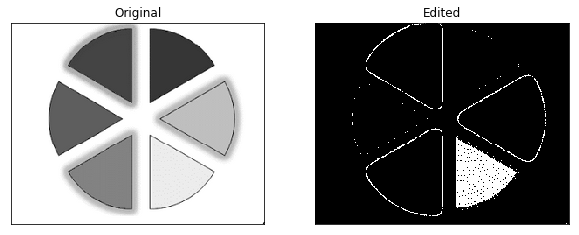

In [70]:
def fraccionamiento(img,minr=10,maxr=60):
    img=cv2.imread(img,0)
    rows,columns = img.shape
    img2 =np.zeros((rows,columns),dtype =np.uint8)
    
    a= minr
    b= maxr
    
    for x in range (0,rows):
        for y in range (0,columns):
          r = img[x][y]
          if a <= r and b >=r:
               img2[x][y] = 255
          else:
                img2[x][y] = 0
    displayGray2(img,img2)
    return
fraccionamiento('pastel.png',230,240)
               

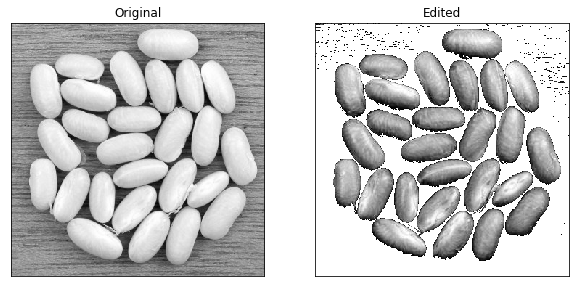

In [94]:
def fraccionamiento(img3,minr=10,maxr=60):
    img3=cv2.imread(img3,0)
    rows,columns = img3.shape
    img4 =np.zeros((rows,columns),dtype =np.uint8)
    
    a= minr
    b= maxr
    
    for x in range (0,rows):
        for y in range (0,columns):
          r = img3[x][y]
          if a <= r and b >=r:
               img4[x][y] = img3[x][y]
          else:
                img4[x][y] = 255
    displayGray2(img3,img4)
    return
fraccionamiento('frijol.jpg',185,255)

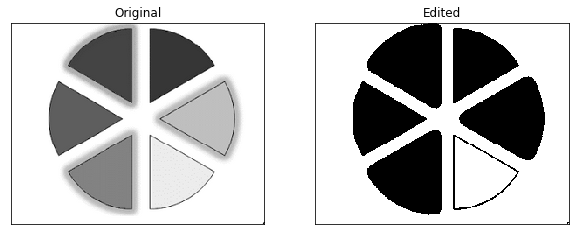

In [106]:
def Threshold (img5,thres):
    img5 = cv2.imread(img5,0)
    rows,columns = img5.shape
    img6 = np.zeros((rows,columns),dtype = np.uint8)
    
    T=thres
    
    for z in range (0,rows):
        for w in range(0, columns):
            c = img5[z][w]
            if T >= c:
                img6[z][w] = 0
            else:
                img6[z][w] = 255
    displayGray2(img5,img6)
    return

Threshold('pastel.png',220)

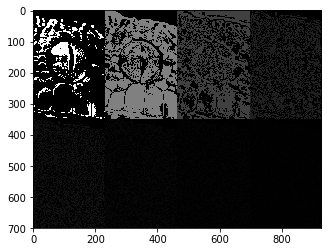

In [109]:
img7 = cv2.imread('ojo.jpg',0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img7.shape[0]):
    for j in range(img7.shape[1]):
         lst.append(np.binary_repr(img7[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img7.shape[0],img7.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img7.shape[0],img7.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img7.shape[0],img7.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img7.shape[0],img7.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img7.shape[0],img7.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img7.shape[0],img7.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img7.shape[0],img7.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img7.shape[0],img7.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

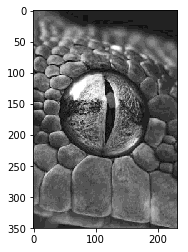

In [110]:
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
plt.imshow(new_img,cmap='gray')